In [7]:
import tensorflow as tf
from IPython.display import Image
import io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

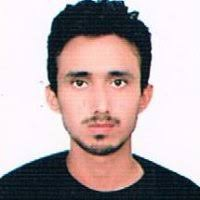

In [9]:
image_data = tf.gfile.FastGFile("shivang.jpg", 'rb').read()
Image(filename='shivang.jpg') 

In [11]:
label_lines = [line.rstrip() for line in tf.gfile.GFile("docLabels.txt")]

# Unpersists graph from file
with tf.gfile.FastGFile("DocGraph.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

with tf.Session() as sess:
    # Feed the image_data as input to the graph and get first prediction
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

    predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})

    # Sort to show labels of first prediction in order of confidence
    top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
    print(top_k)
    for node_id in top_k[:1]:
        human_string = label_lines[node_id]
        score = predictions[0][node_id]
        print('%s (score = %.5f)' % (human_string, score))

[4 3 0 1 2]


IndexError: list index out of range